<a href="https://colab.research.google.com/github/SaifuliAnna/DataScience_HW5/blob/main/Hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вторая часть

Во вторая части прошлого домашнего задания мы решали дифференциальные уравнения и строили графики. Продолжаем работать над этой домашней работой дальше.

Необходимо методом наименьших квадратов:


*   для набора данных графика функции $S(t)$ получить уравнение вида $$S(t)=S_0e^{−αt}$$
*   для набора данных графика функции $I(t)$ получить уравнение вида $$I(t)=(I_0+αS_0t)e^{−αt}$$

Для уравнения $R(t)$ график функции будет $R(t)=N−S(t)−I(t)$



*   Построить все три графика $S(t)$, $I(t)$ и $R(t)$ на одной области отображения полученные методом наименьших квадратов
*   Найти время $t_{max​}$ при котором число инфекционных индивидов максимально. Надо с помощью метода $minimize_scalar$ найти когда функция $I(t)$ достигает своего максимума.





In [200]:
a = 0.5
b = 0.3
N0 = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

In [201]:
from scipy.optimize import leastsq, minimize_scalar

import numpy as np
import matplotlib.pyplot as plt

In [202]:
s = np.array([9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00])

In [203]:
t = np.linspace(0, 25, 17)
t

array([ 0.    ,  1.5625,  3.125 ,  4.6875,  6.25  ,  7.8125,  9.375 ,
       10.9375, 12.5   , 14.0625, 15.625 , 17.1875, 18.75  , 20.3125,
       21.875 , 23.4375, 25.    ])

In [204]:
def func_s(t, a, S0):
    return (S0 * np.exp(-a * t))

def diff_s(p, y, t):
    a, S0 = p
    return s - func_s(t, a, S0)

p0 = a, S0
sol_s, _ = leastsq(diff_s, p0, args=(y, t))
sol_s

array([2.89531594e-01, 1.11489959e+06])

In [205]:
def func_i(t, a, S0, I0):
    return ((I0 + a * S0 * t) * np.exp(-a * t))

def diff_i(p_i, y, t):
    a, S0, I0 = p_i
    return s - func_i(t, a, S0, I0)

sol_i, _ = leastsq(diff_i, (a, S0, I0), args=(y, t))
sol_i

array([7.20109415e-01, 1.69861122e+06, 9.89246002e+05])

In [206]:
R = N0 - func_s(t, sol_s[0], sol_s[1]) - func_i(t, sol_i[0], sol_i[1], sol_i[2])
R

array([-1104145.58770846,  -650677.22709909,    41903.70691485,
         483112.67419199,   721612.78387164,   845888.03496899,
         911570.53185788,   947562.7460331 ,   968108.21058922,
         980262.00857607,   987646.44334073,   992215.10636239,
         995074.28495236,   996876.08001838,   998016.16034198,
         998739.22805523,   999198.42110785])

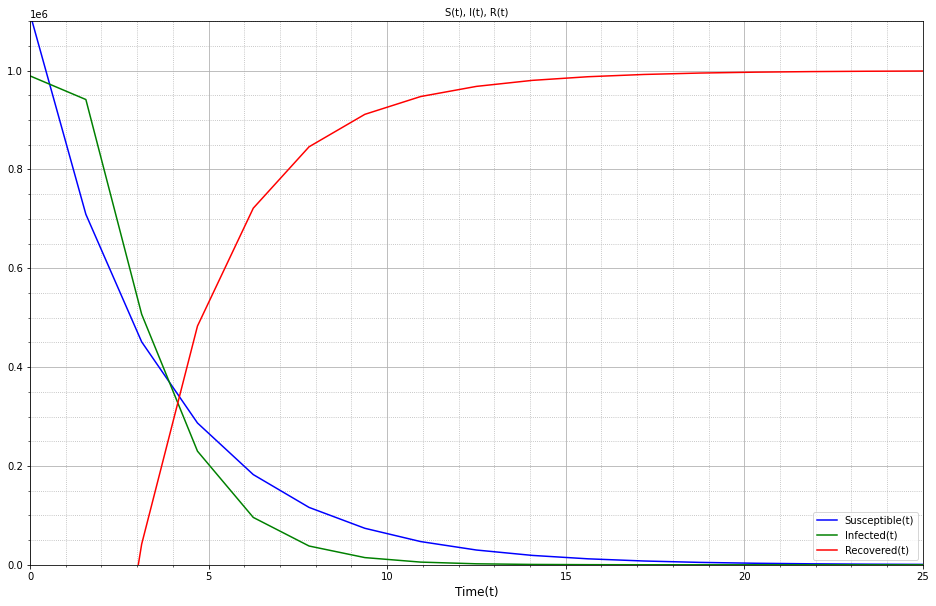

In [208]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.title('S(t), I(t), R(t)', fontsize=10, color='k')
plt.xlabel('Time(t)', fontsize=12, color='k') 


plt.xlim([0, 25])
plt.ylim([0, 1100000])

y_p = sol_s[1] * np.exp(-sol_s[0] * t)
y_pi = (sol_i[2] + sol_i[0] * sol_i[1] * t) * np.exp(-sol_i[0] * t)
y_pr = N0 - sol_s[1] - sol_i[2]

plt.plot(t, y_p, color='blue', label='Susceptible(t)')

plt.plot(t, y_pi, color='green', label='Infected(t)')

plt.plot(t, R, color='red', label='Recovered(t)')


plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');